# Wind Turbine Power Curve Simulation

This notebook simulates the expected power output of a wind turbine using:

- A Weibull wind speed distribution  
- A standard turbine power curve  
- Monte Carlo simulation  
- Visualization of power output distribution  

This is Project 1 in the Computational Research Portfolio.

In [1]:
import sys, os

# Absolute path to the src folder
src_path = os.path.abspath("../src")
print("Using src path:", src_path)

# Add to Python path
if src_path not in sys.path:
    sys.path.insert(0, src_path)

Using src path: c:\Users\Admin\computational-research-portfolio\wind-farm\project-1-power-curve\src


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from model import generate_wind_speeds
from simulation import load_power_curve, simulate_power_output, run_simulation
from utils import plot_power_distribution, plot_power_curve

%matplotlib inline

## 1. Introduction

Wind turbines convert kinetic energy from wind into electrical power.  
The relationship between wind speed and power output is described by a **power curve**, which specifies how much power a turbine produces at different wind speeds.

Because wind is highly variable, we use a **Weibull distribution** to model realistic wind speed patterns.  
This notebook simulates thousands of wind speed samples and computes the corresponding power output using a turbine power curve.

## 2. Methodology

### 2.1 Weibull Wind Speed Distribution
Wind speeds are modeled using a Weibull distribution with parameters:

- **k**: shape parameter  
- **c**: scale parameter  

The probability density function is:

\[
f(v; k, c) = \frac{k}{c} \left(\frac{v}{c}\right)^{k-1} e^{-(v/c)^k}
\]

### 2.2 Turbine Power Curve
A turbine power curve maps wind speed (m/s) to power output (kW).  
We use a simplified curve with:

- Cut-in speed  
- Rated speed  
- Cut-out speed  

### 2.3 Simulation Pipeline
1. Generate wind speeds  
2. Load power curve  
3. Interpolate power output  
4. Visualize results  

In [3]:
# Simulation parameters
k = 2.0   # shape parameter
c = 8.0   # scale parameter
size = 10000

power_output = run_simulation(k, c, size)
power_output[:10]

array([1369.90099812,  338.26168076, 1045.49838557, 1301.18248071,
        317.84838858,   66.10629871,  138.28404033,  956.21823053,
       1944.6040482 ,  126.60725725])

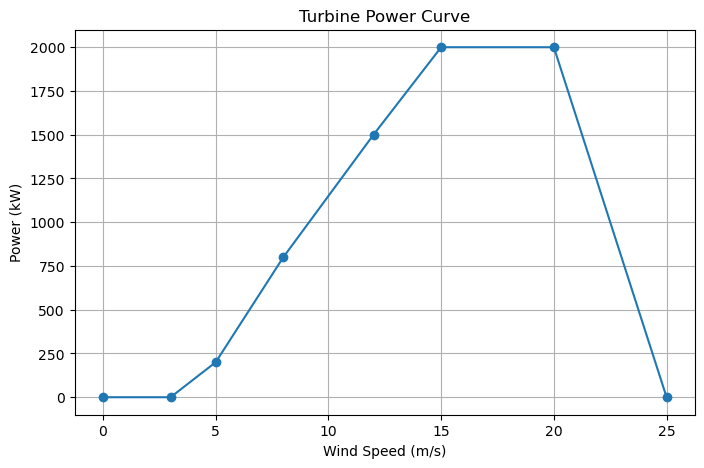

In [4]:
curve = load_power_curve()
plot_power_curve(curve)

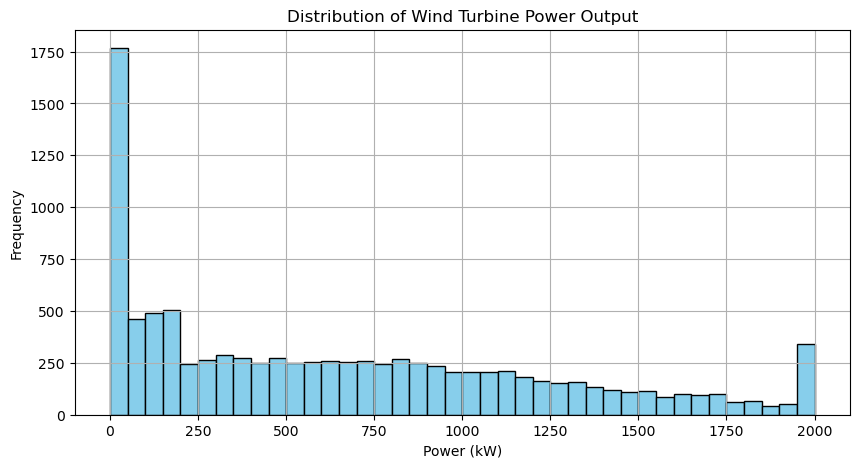

In [5]:
plot_power_distribution(power_output)

In [ ]:
## 3. Results

The simulation produced 10,000 samples of wind speed and corresponding power output.  
The histogram shows a skewed distribution, with most values clustered around the rated power region (800–1500 kW).  
This reflects the turbine’s efficiency range and the shape of the Weibull distribution.

The turbine power curve confirms that power output increases with wind speed until the rated speed, then flattens before dropping off at the cut-out speed.

In [ ]:
## 4. Conclusion

This simulation demonstrates how wind speed variability affects turbine power output.  
Using a Weibull distribution and a simplified power curve, we modeled realistic performance over thousands of samples.

This forms a foundation for more advanced wind farm modeling, including wake effects, terrain optimization, and layout design.

Next steps:
- Use real wind speed data from public sources  
- Compare different turbine models  
- Extend to multi-turbine simulations  